In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
# Feature and Target Selection
X = df.iloc[:,:-1]  #feature
y = df.iloc[:,-1]    # target

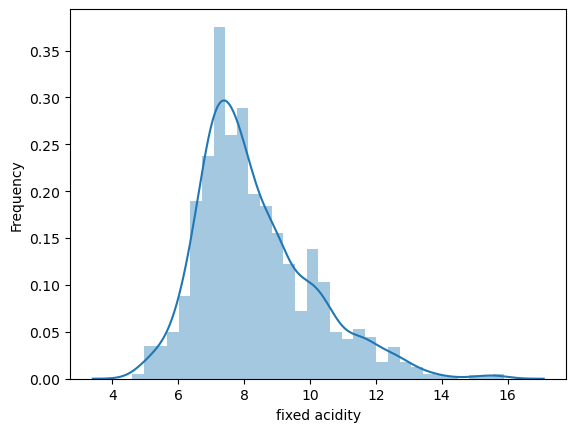

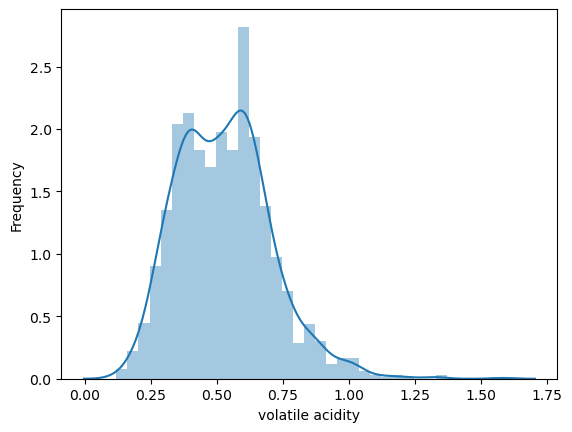

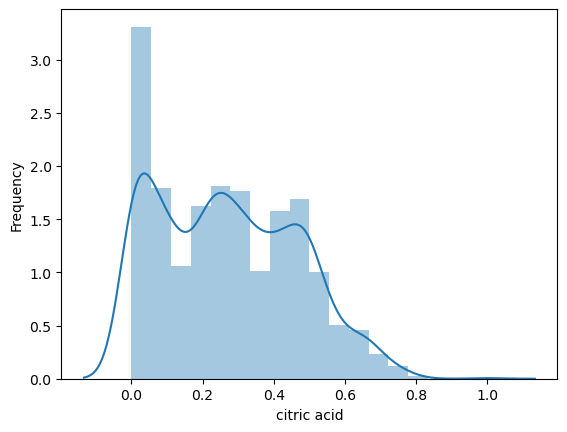

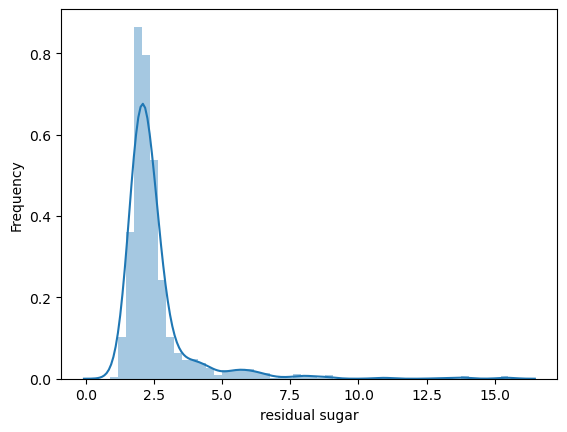

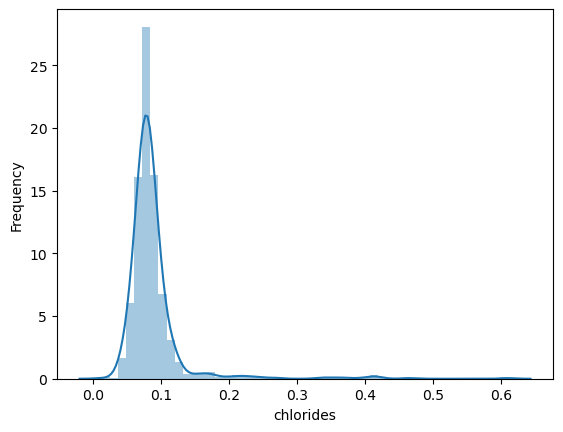

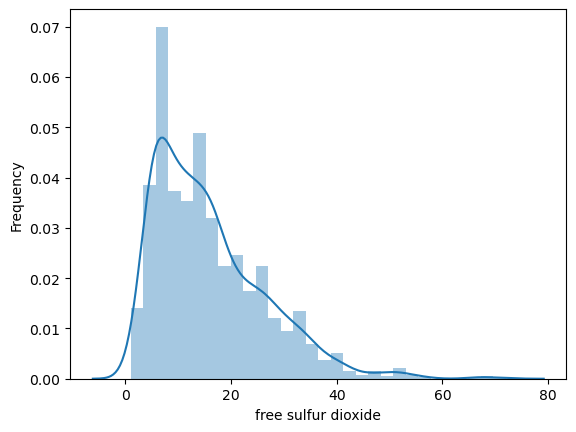

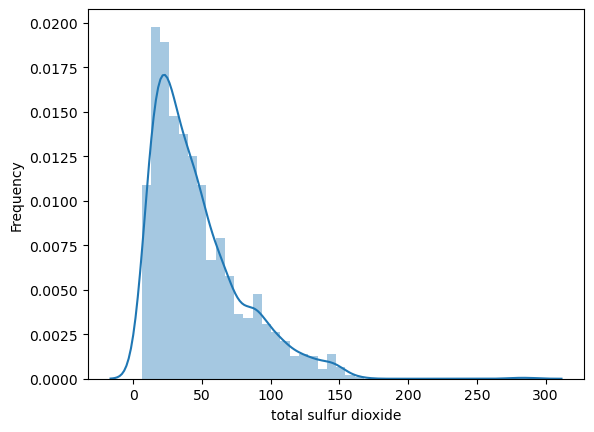

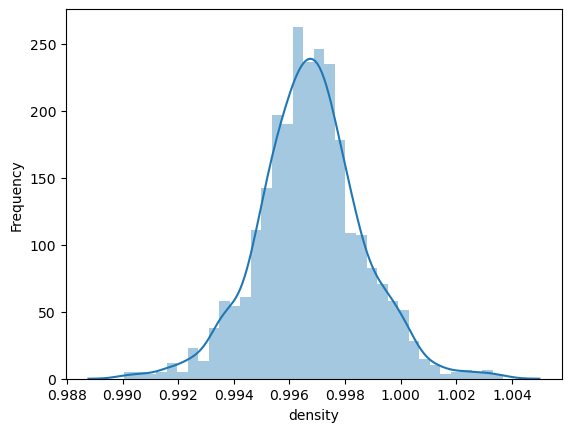

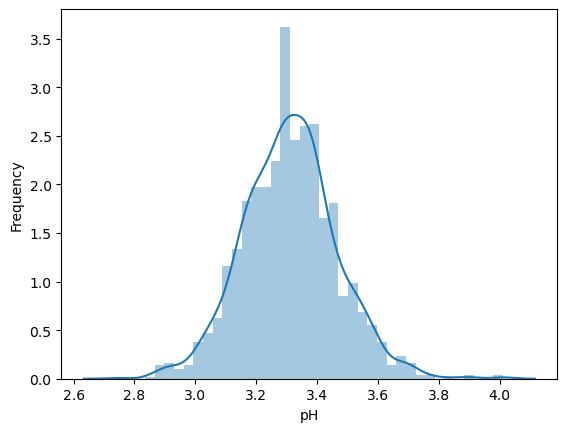

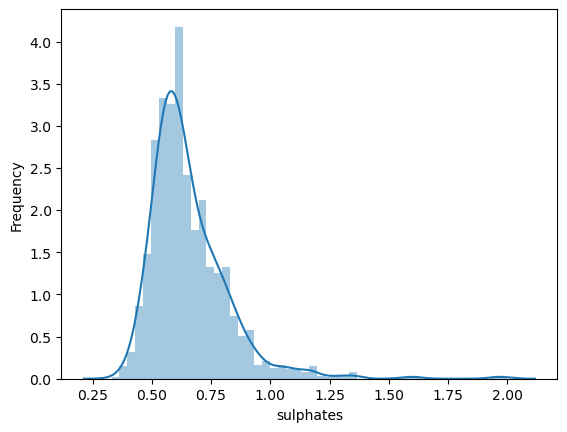

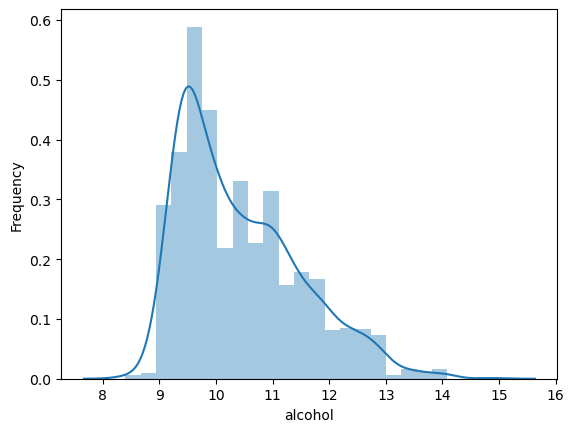

In [8]:
# feature target relationship 
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel('Frequency')
    plt.show()

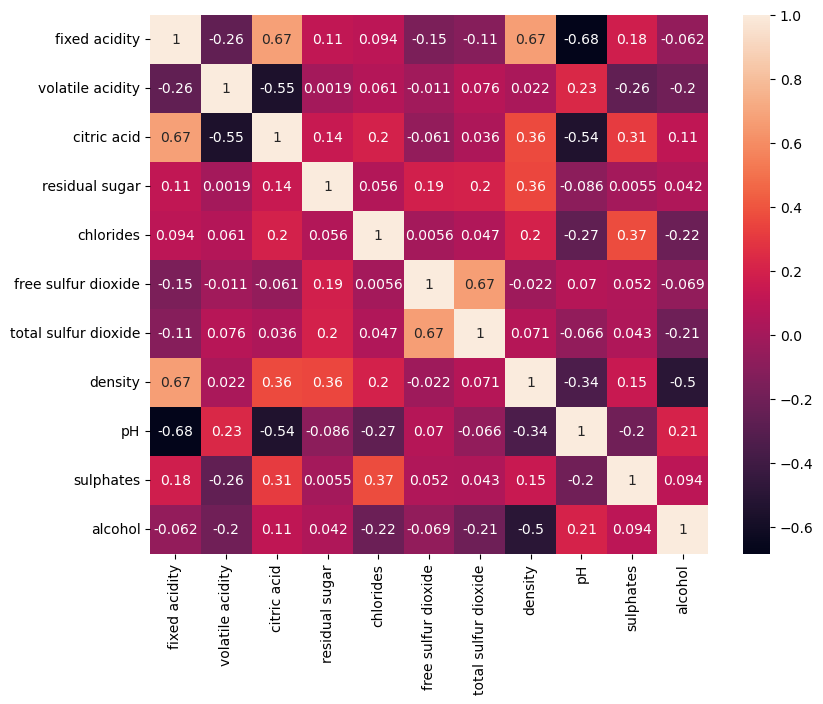

In [9]:
# Multi Colinearity
plt.figure(figsize=(9,7))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =1)

In [11]:
# model   
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_train,y_train)

1.0

In [13]:
# testing model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.19      0.14      0.16        21
           5       0.67      0.68      0.67       207
           6       0.64      0.58      0.61       195
           7       0.47      0.60      0.53        52
           8       0.25      0.33      0.29         3

    accuracy                           0.60       480
   macro avg       0.37      0.39      0.38       480
weighted avg       0.61      0.60      0.60       480



In [14]:
# model
model1 = DecisionTreeClassifier(criterion = 'entropy')
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# testing model
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.05      0.07        21
           5       0.71      0.72      0.71       207
           6       0.57      0.56      0.56       195
           7       0.37      0.44      0.40        52
           8       0.20      0.33      0.25         3

    accuracy                           0.59       480
   macro avg       0.33      0.35      0.33       480
weighted avg       0.58      0.59      0.58       480



In [16]:
#depth
model1.get_depth()

18

In [17]:
# create a new model by defining the max depth value
model2 = DecisionTreeClassifier(max_depth = 8)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [18]:
# Predict
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.05      0.07        21
           5       0.64      0.74      0.69       207
           6       0.63      0.58      0.60       195
           7       0.47      0.44      0.46        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.32      0.30      0.30       480
weighted avg       0.59      0.61      0.60       480



In [19]:
# min - samples - leaf
model3=DecisionTreeClassifier(min_samples_leaf=18)
model3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=18)

In [20]:
# Predict
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.60      0.68      0.63       207
           6       0.53      0.55      0.54       195
           7       0.46      0.37      0.41        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.26      0.27      0.26       480
weighted avg       0.52      0.56      0.54       480



In [21]:
!pip install imbalanced_learn

In [22]:
# Random over Sampling
from imblearn.over_sampling import RandomOverSampler

In [23]:
# creating a oversampler and adding datapoints to the exisiting datasets
rs = RandomOverSampler(random_state = 1)    # random datapoints are generated    
X_sample_rs, y_sample_rs = rs.fit_resample(X_train, y_train)      # Those data are added to training value

In [24]:
y_sample_rs.value_counts()

5    474
6    474
7    474
8    474
4    474
3    474
Name: quality, dtype: int64

In [25]:
# model
model4 = DecisionTreeClassifier(min_samples_leaf= 5)
model4.fit(X_sample_rs, y_sample_rs)

DecisionTreeClassifier(min_samples_leaf=5)

In [26]:
model4.get_depth()

17

In [27]:
# testing and evaluation
y_pred = model4.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.19      0.21        21
           5       0.67      0.67      0.67       207
           6       0.60      0.57      0.58       195
           7       0.42      0.42      0.42        52
           8       0.09      0.33      0.14         3

    accuracy                           0.58       480
   macro avg       0.33      0.36      0.34       480
weighted avg       0.59      0.58      0.58       480



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 75, max_depth = 18, max_features = 8)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, max_features=8, n_estimators=75)

In [30]:
y_pred= rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.05      0.09        21
           5       0.72      0.83      0.77       207
           6       0.68      0.66      0.67       195
           7       0.53      0.50      0.51        52
           8       1.00      0.33      0.50         3

    accuracy                           0.68       480
   macro avg       0.65      0.39      0.42       480
weighted avg       0.69      0.68      0.67       480



In [31]:
# The dataset is an incomplete dataset and it is multiclass dataset
# Wine qualities are 1,2,3,4,5,6,7,8,9,10
# 1,2,3,4,5 -----> Poor quality
# 6,7,8,9,10 ------> Good Quality
# So we will convert above quality(target) values from multiclass to binary class i.e. 0-poor , 1-good

In [32]:
# Converting Multi class data to binary class
df = pd.read_csv('winequality-red.csv')

In [33]:
# Function to convert multiclass target to binary target
def multi_to_bin(n):
    if n>=6:
        return 1
    else:
        return 0

In [34]:
multi_to_bin(8)

1

In [35]:
df['quality-bin']=df['quality'].apply(multi_to_bin)

In [36]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [37]:
# Feature target split
X= df.drop(['quality','quality-bin'],axis = 1)
y = df['quality-bin']

In [38]:
# Train test split
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

In [39]:
# Model: Random Forest
rf = RandomForestClassifier(n_estimators = 75)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75)

In [40]:
# testing
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       230
           1       0.84      0.81      0.82       250

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480

